In [1]:
import tensorflow as tf
from gradient_accumulator.GAModelWrapper import GAModelWrapper


######### MODEL #########


base_model = tf.keras.applications.ResNet152V2(include_top=True, 
                                                   weights=None, 
                                                input_shape=(360, 256, 2), 
                                                classes=1,
                                                classifier_activation="sigmoid")
inputs = tf.keras.Input(shape=(360, 256, 2))
x = base_model(inputs, training=False)
model = tf.keras.Model(inputs, x)

model = GAModelWrapper(accum_steps=1, inputs=model.input, outputs=model.output)


model.load_weights("best_model.h5")



/home/viktor/.local/lib/python3.10/site-packages/keras/applications/resnet.py:135: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 2 input channels.
  input_shape = imagenet_utils.obtain_input_shape(
2022-12-28 01:17:18.113344: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-28 01:17:18.142425: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-28 01:17:18.142615: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-28 01:17:18.143018: I tensorflow/core/platform/cpu_feature_guard.cc:193] T

ValueError: Layer count mismatch when loading weights from file. Model expected 1 layers, found 307 saved layers.

In [ ]:
model.summary()

Model: "ga_model_wrapper_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 360, 256, 2)]     0         
                                                                 
 resnet152v2 (Functional)    (None, 1)                 58330561  
                                                                 
Total params: 116,517,379
Trainable params: 58,186,817
Non-trainable params: 58,330,562
_________________________________________________________________


(array([43.,  5.,  3.,  3.,  3.,  1.,  1.,  2.,  2.,  1.]),
 array([  46.73292,  250.487  ,  454.2411 ,  657.9952 ,  861.7492 ,
        1065.5033 , 1269.2573 , 1473.0115 , 1676.7655 , 1880.5197 ,
        2084.2737 ], dtype=float32),
 <BarContainer object of 10 artists>)

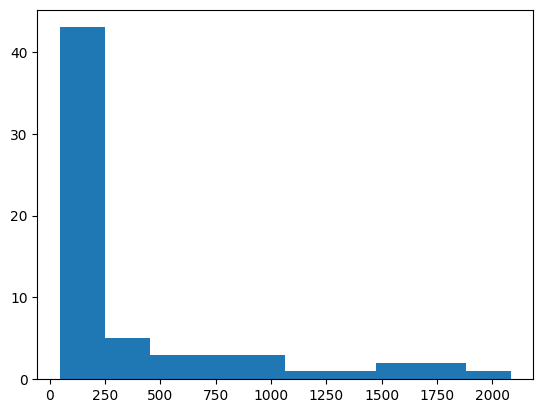

In [ ]:
plt.hist(model.layers[-1].layers[5].weights[3].numpy().flatten())

In [ ]:
# visualizue model structure
tf.keras.utils.plot_model(model.layers[-1], show_shapes=True, dpi=64)

In [2]:
import pandas as pd
df = pd.read_csv("/media/viktor/T7/gravitational-waves-kaggle-2022/datasets/dataset-v1/data.csv")
df_d = pd.read_csv("/media/viktor/T7/gravitational-waves-kaggle-2022/datasets/dataset-v2/data.csv")
df = pd.concat([df, df_d], ignore_index=True)
df

,file,label,depth
0,/media/viktor/T7/gravitational-waves-kaggle-20...,1,14.395424
1,/media/viktor/T7/gravitational-waves-kaggle-20...,0,16.763065
2,/media/viktor/T7/gravitational-waves-kaggle-20...,1,23.607238
3,/media/viktor/T7/gravitational-waves-kaggle-20...,0,21.931825
4,/media/viktor/T7/gravitational-waves-kaggle-20...,0,9.933270
...,...,...,...
163995,/media/viktor/T7/gravitational-waves-kaggle-20...,0,30.794586
163996,/media/viktor/T7/gravitational-waves-kaggle-20...,0,23.115460
163997,/media/viktor/T7/gravitational-waves-kaggle-20...,0,28.559574
163998,/media/viktor/T7/gravitational-waves-kaggle-20...,0,30.402129


In [20]:
df["depth"].max()

32.99977483520588

In [21]:

# df = df[df["depth"] < 15].reset_index(drop=True)
# take 256 samples
df = df.sample(125).reset_index(drop=True)
df

,file,label,depth
0,/media/viktor/T7/gravitational-waves-kaggle-20...,1,17.839286
1,/media/viktor/T7/gravitational-waves-kaggle-20...,0,29.234535
2,/media/viktor/T7/gravitational-waves-kaggle-20...,0,25.596651
3,/media/viktor/T7/gravitational-waves-kaggle-20...,1,29.933652
4,/media/viktor/T7/gravitational-waves-kaggle-20...,0,13.746200
...,...,...,...
120,/media/viktor/T7/gravitational-waves-kaggle-20...,0,22.295418
121,/media/viktor/T7/gravitational-waves-kaggle-20...,0,15.786092
122,/media/viktor/T7/gravitational-waves-kaggle-20...,1,23.853314
123,/media/viktor/T7/gravitational-waves-kaggle-20...,0,15.533073


In [22]:
# Loop over the dataset and make predictions: save the predictions to a list and create a column in the dataframe
# with the predictions
import numpy as np
from tqdm import tqdm
predictions = []
for i in tqdm(range(len(df))):
    # Get the path to the file
    path = df.iloc[i]["file"]
    # Load the data
    data = np.load(path)
    # Reshape the data
    data = data.reshape(1, 360, 256, 2)
    # Make a prediction
    prediction = model.predict(data, verbose=0)
    # Save the prediction
    predictions.append(prediction[0][0])
    
df["prediction"] = predictions
df

100%|██████████| 125/125 [00:08<00:00, 13.92it/s]


,file,label,depth,prediction
0,/media/viktor/T7/gravitational-waves-kaggle-20...,1,17.839286,0.354788
1,/media/viktor/T7/gravitational-waves-kaggle-20...,0,29.234535,0.297713
2,/media/viktor/T7/gravitational-waves-kaggle-20...,0,25.596651,0.331340
3,/media/viktor/T7/gravitational-waves-kaggle-20...,1,29.933652,0.350771
4,/media/viktor/T7/gravitational-waves-kaggle-20...,0,13.746200,0.291759
...,...,...,...,...
120,/media/viktor/T7/gravitational-waves-kaggle-20...,0,22.295418,0.337452
121,/media/viktor/T7/gravitational-waves-kaggle-20...,0,15.786092,0.346561
122,/media/viktor/T7/gravitational-waves-kaggle-20...,1,23.853314,0.476726
123,/media/viktor/T7/gravitational-waves-kaggle-20...,0,15.533073,0.396907


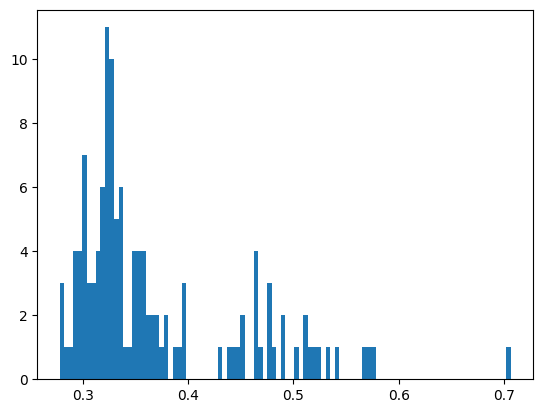

In [23]:
import matplotlib.pyplot as plt
plt.hist(df["prediction"], bins=100);

In [24]:
# calculate auc
from sklearn.metrics import roc_auc_score
roc_auc_score(df["label"], df["prediction"])

0.799022130725682